Loading Audio File at  ../ML_MUSIC1/Assets/test_songs/F J Blues - Unknown Man.mp3
	10%
	20%
	30%
	40%
	50%
	60%
	70%
	80%
	90%
	100%
Loading Audio File at  ../ML_MUSIC1/Assets/test_songs/rocktest.wav
	10%
	20%
	30%
	40%
	50%
	60%
	70%
	80%
	90%
	100%


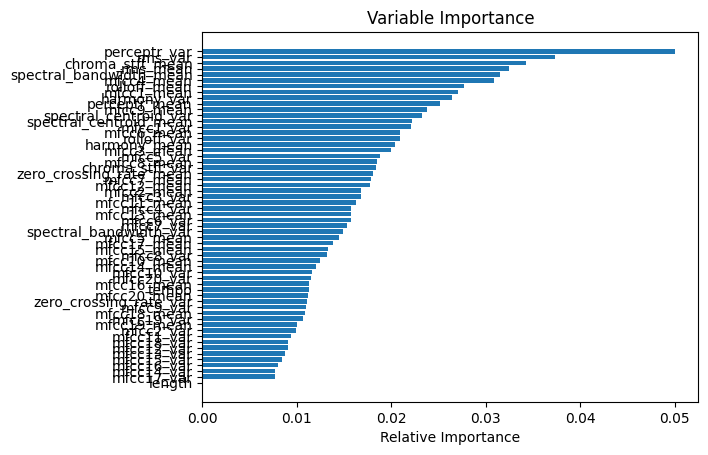

In [1]:
import sys
sys.path.insert(0, 'Models')
from data_prep import prepareData

extra_paths = [
    '../ML_MUSIC1/Assets/test_songs/F J Blues - Unknown Man.mp3',
    '../ML_MUSIC1/Assets/test_songs/rocktest.wav'
]
extra_labels = ['blues', 'rock']
X_train, Y_train, X_test, Y_test = prepareData(test_size=0.3, n_features=13, extra_paths=extra_paths, extra_labels=extra_labels)

In [5]:
from train import train
models = train(X_train, Y_train)

Fitting 10 folds for each of 90 candidates, totalling 900 fits
Best KNN Model Parameters:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
Fitting 10 folds for each of 32 candidates, totalling 320 fits


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


knn = KNeighborsClassifier(n_neighbors=4, weights='distance', metric='manhattan').fit(X_train, Y_train)
mlp = MLPClassifier(activation='relu', alpha=0.0001, solver='adam', hidden_layer_sizes=(100,50,25), learning_rate='constant').fit(X_train, Y_train)
mlp2 = MLPClassifier().fit(X_train, Y_train)
nb = GaussianNB().fit(X_train, Y_train)
svm = SVC(decision_function_shape="ovo").fit(X_train, Y_train)
clf = RandomForestClassifier(max_depth=11, n_estimators=200, random_state=0).fit(X_train, Y_train)



models = [knn, mlp, nb, svm,clf]

In [21]:
for i in range (1,20):    
    clf = RandomForestClassifier(max_depth=i, n_estimators=200, random_state=0).fit(X_train, Y_train)
    print(i,'  score: ', test(clf, X_test, Y_test))



1   score:  0.298432810936979
2   score:  0.42047349116372124
3   score:  0.46648882960987
4   score:  0.5011670556852285
5   score:  0.5521840613537846
6   score:  0.5961987329109704
7   score:  0.6375458486162054
8   score:  0.6815605201733911
9   score:  0.7125708569523175
10   score:  0.742914304768256
11   score:  0.7639213071023675
12   score:  0.7849283094364788
13   score:  0.7959319773257753
14   score:  0.802267422474158
15   score:  0.8142714238079359
16   score:  0.8172724241413805
17   score:  0.820273424474825
18   score:  0.820273424474825
19   score:  0.8182727575858619


In [14]:
print(clf.predict(X_test[-2:]))

['reggae' 'disco']


In [17]:
from test import test, classify
models_names = ['knn', 'mlp', 'nb', 'svm','clf']
for model, name in zip(models,models_names):
    print(name, ' score: ', test(model, X_test, Y_test))

knn  score:  0.8499499833277759
mlp  score:  0.8209403134378126
nb  score:  0.4454818272757586
svm  score:  0.737245748582861
clf  score:  0.6375458486162054


In [16]:
n_examples = 2 # number of extra files to test
for model, name in zip(models,models_names):
    print(name, ' guess: ', classify(model, X_test[-n_examples:]))

knn  guess:  ['reggae' 'disco']
mlp  guess:  ['reggae' 'rock']
nb  guess:  ['country' 'country']
svm  guess:  ['reggae' 'rock']
clf  guess:  ['reggae' 'disco']
